# K-Medoids (PAM) Clustering
K-Medoids is a clustering algorithm similar to K-Means but more robust to noise and outliers. The Partitioning Around Medoids (PAM) algorithm is one of the most common implementations of K-Medoids. Unlike K-Means, which uses the mean of cluster points as the center, K-Medoids uses actual data points (medoids) to represent the center of clusters.
### Steps in PAM Algorithm:
- Initialization: Randomly select k data points as the initial medoids.
- Assignment: Assign each data point to the nearest medoid.
- Update: For each cluster, select a new medoid that minimizes the total distance within the cluster.
- Repeat: Continue the assignment and update steps until the medoids do not change.

## Use Cases
- Customer Segmentation: Grouping customers based on purchasing behavior for targeted marketing.
- Anomaly Detection: Identifying unusual data points that do not fit into any cluster.
- Image Compression: Reducing the number of colors in an image by clustering similar colors.
- Social network analysis

## Advantages
- More robust to noise and outliers compared to K-Means.
- Medoids are actual data points, making the results easier to interpret.
- Work with huge data better than DBSCAN

## Disadvantages
- Computationally more expensive than K-Means.
- Not scalable for large datasets due to its complexity.


# import library

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"

# plot the Elbow

In [3]:
# Helper function to plot the Elbow Method graph
def plot_elbow_method(data, max_k):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMedoids(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()


# visualize clusters

In [4]:
# Helper function to visualize clusters
def visualize_clusters(data, n_clusters):
    kmeans = KMedoids(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(data)
    plt.figure(figsize=(8, 5))
    plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title(f'Visualization of {n_clusters} Clusters')
    plt.show()
    return y_kmeans


# evaluate clusters

In [5]:
# Helper function to evaluate clusters
def evaluate_clusters(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Score: {db_score}')

# Using make_blobs

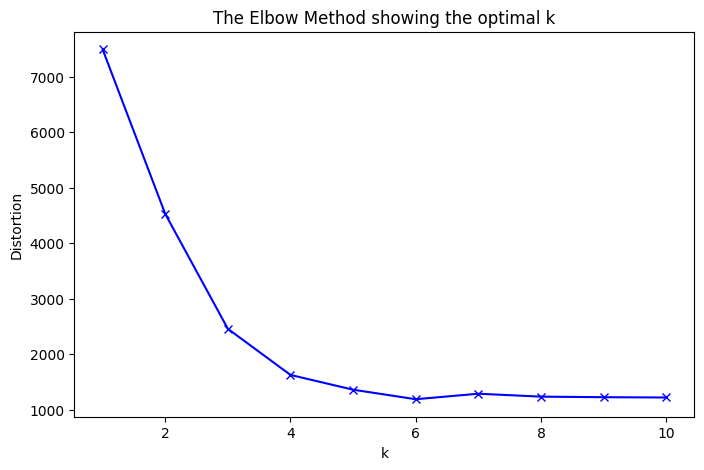

In [38]:
data_blobs, _ = make_blobs(n_samples=1000, centers=6, cluster_std=1, random_state=42)
plot_elbow_method(data_blobs, 10)

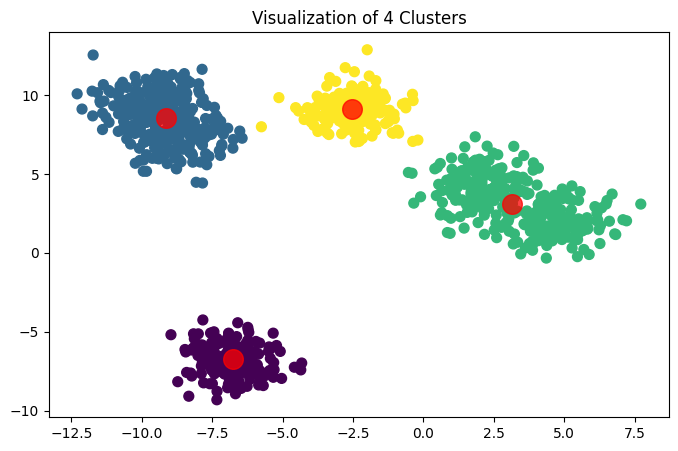

In [39]:
labels_blobs = visualize_clusters(data_blobs, 4)

In [40]:
evaluate_clusters(data_blobs, labels_blobs)

Silhouette Score: 0.7090835459579187
Davies-Bouldin Score: 0.3663107533057448


# Using make_moons

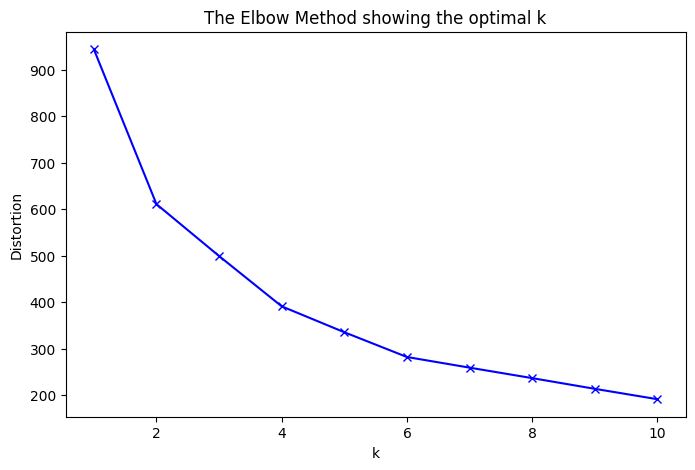

In [24]:
data_moons, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
plot_elbow_method(data_moons, 10)

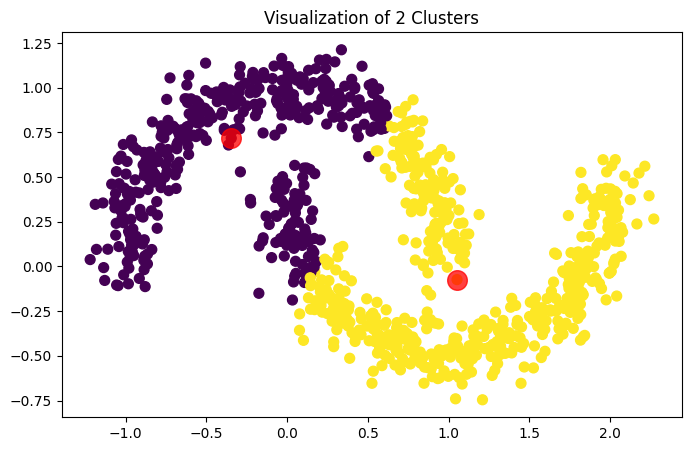

In [25]:
labels_moons = visualize_clusters(data_moons, 2)

In [26]:
evaluate_clusters(data_moons, labels_moons)

Silhouette Score: 0.4806853698436412
Davies-Bouldin Score: 0.7862037148806795


# Using make_circles

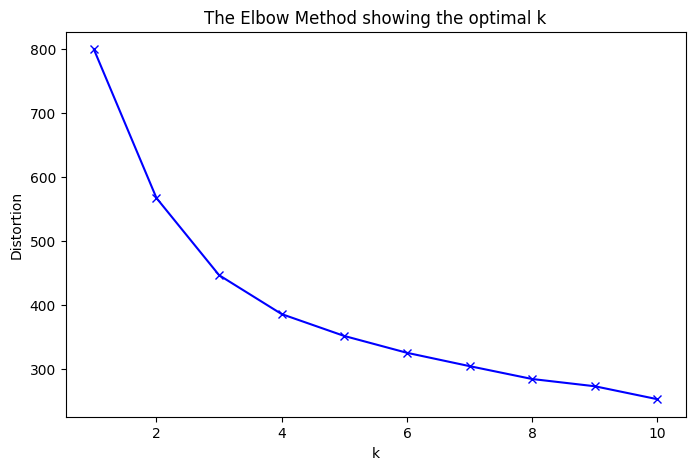

In [21]:
data_circles, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
plot_elbow_method(data_circles, 10)

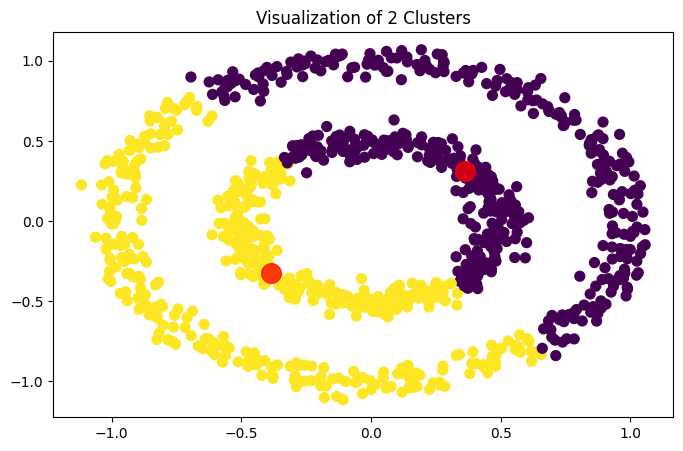

In [22]:
labels_circles = visualize_clusters(data_circles, 2)

In [23]:
evaluate_clusters(data_circles, labels_circles)

Silhouette Score: 0.3541310806981948
Davies-Bouldin Score: 1.1853394709634917
